In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime 

In [2]:
import datetime
import wordcloud
import json

In [3]:
df = pd.read_csv('/content/USvideos.csv')
df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

video_id trending_date  \
42   NZFhMSgbKKM      17.14.11   
47   sbcbvuitiTc      17.14.11   
175  4d07RXYLsJE      17.14.11   

                                                 title  \
42   Dennis Smith Jr. and LeBron James go back and ...   
47   Stephon Marbury and Jimmer Fredette fight in C...   
175                Sphaera - demonstrating interaction   

                channel_title  category_id              publish_time  \
42               Ben Rohrbach           17  2017-11-13T15:11:00.000Z   
47   NBA Highlights · YouTube           17  2017-11-10T18:23:05.000Z   
175              Jenny Hanell           28  2017-11-04T20:48:16.000Z   

                          tags   views  likes  dislikes  comment_count  \
42                      [none]     945      7         5              8   
47   NBA|"Basketball"|"Sports"  956169   2017      2425           1447   
175                     [none]    1827      3         0              2   

                                     thumbnail_link  comments_disabled  \
42   https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg              False   
47   https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg              False   
175  https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg              False   

     ratings_disabled  video_error_or_removed description  
42              False                   False         NaN  
47              False                   False         NaN  
175             False                   False         NaN

In [6]:
df['description'].fillna(value ="", inplace = True)

In [7]:
df.describe()


category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

In [8]:
df['date']=pd.to_datetime(df.iloc[:,5])
df['date'].dt.year.value_counts()

2018    30279
2017    10428
2013       44
2015       35
2016       35
2014       32
2011       27
2012       24
2010       19
2009       14
2008       11
2006        1
Name: date, dtype: int64

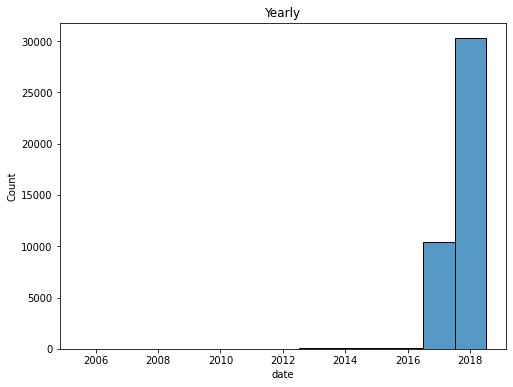

In [9]:
fig, ax = plt.subplots(figsize =(8,6))
sns.histplot(data = df, x = df['date'].dt.year, discrete= True)
plt.title('Yearly')
plt.show()

In [10]:
df.corr()

category_id     views     likes  dislikes  \
category_id                1.000000 -0.168231 -0.173921 -0.033547   
views                     -0.168231  1.000000  0.849177  0.472213   
likes                     -0.173921  0.849177  1.000000  0.447186   
dislikes                  -0.033547  0.472213  0.447186  1.000000   
comment_count             -0.076307  0.617621  0.803057  0.700184   
comments_disabled          0.048949  0.002677 -0.028918 -0.004431   
ratings_disabled          -0.013506  0.015355 -0.020888 -0.008230   
video_error_or_removed    -0.030011 -0.002256 -0.002641 -0.001853   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.076307           0.048949         -0.013506   
views                        0.617621           0.002677          0.015355   
likes                        0.803057          -0.028918         -0.020888   
dislikes                     0.700184          -0.004431         -0.008230   
comment_count                1.000000          -0.028277         -0.013819   
comments_disabled           -0.028277           1.000000          0.319230   
ratings_disabled            -0.013819           0.319230          1.000000   
video_error_or_removed      -0.003725          -0.002970         -0.001526   

                        video_error_or_removed  
category_id                          -0.030011  
views                                -0.002256  
likes                                -0.002641  
dislikes                             -0.001853  
comment_count                        -0.003725  
comments_disabled                    -0.002970  
ratings_disabled                     -0.001526  
video_error_or_removed                1.000000

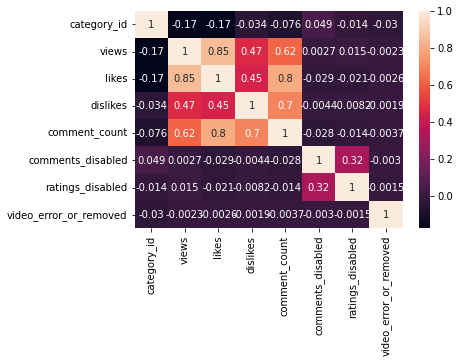

In [11]:
#correlation between variables using heatmap
sns.heatmap(df.corr(), annot = True)

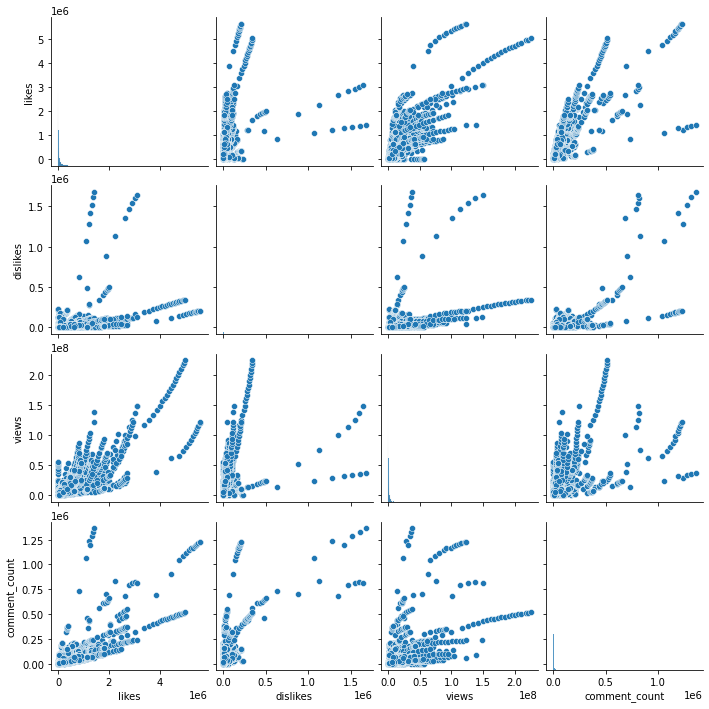

In [12]:
temp = df[['likes', 'dislikes', 'views', 'comment_count']]
sns.pairplot(data =temp)
plt.show()

In [13]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'date'],
      dtype='object')

In [14]:
#category wise count
df.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

In [15]:
with open('/content/US_category_id.json') as f:
  categories = json.load(f)["items"]
categories 

[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHe

In [16]:
cat_dict = {}
for cat in categories:
  cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['Category_name'] = df['category_id'].map(cat_dict)

In [17]:
df.Category_name.value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: Category_name, dtype: int64

In [18]:
# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
# Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax.
#  Having fig is useful if you want to change figure-level attributes or save the figure as an 
#  image file later (e.g. with fig.savefig('yourfilename.png')). You certainly
#   don't have to use the returned figure object but many people do use it later so it's 
#   common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:


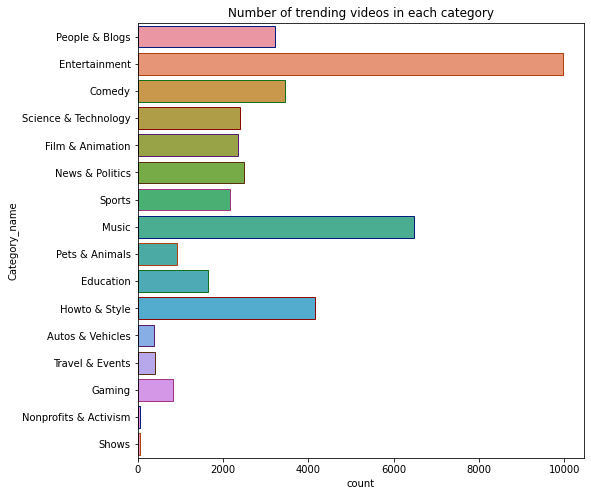

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

_=sns.countplot(y="Category_name", data=df, orient='h',
                   edgecolor=sns.color_palette("dark", 7),ax=ax)
_.set_title('Number of trending videos in each category')
plt.show()

In [20]:
# one of the max trending education 
max_trend=df[df['Category_name']=='Education']
s=max_trend[['title','channel_title']]
s.describe().T

count unique                                                top  \
title          1656    257  The Deadliest Being on Planet Earth – The Bact...   
channel_title  1656     67                                             TED-Ed   

              freq  
title           28  
channel_title  162

In [21]:
max_trend.channel_title.value_counts().nlargest(20)

TED-Ed                        162
Tom Scott                     159
Life Noggin                   148
The King of Random            148
SciShow                       135
Kurzgesagt – In a Nutshell    115
Half as Interesting            71
The School of Life             63
The Infographics Show          58
Wendover Productions           46
CGP Grey                       28
Mental Floss                   26
Practical Engineering          25
MatthewSantoro                 22
Physics Girl                   22
Tyler, The Creator             22
RealLifeLore                   22
It's Okay To Be Smart          21
jacksepticeye                  21
Today I Found Out              19
Name: channel_title, dtype: int64

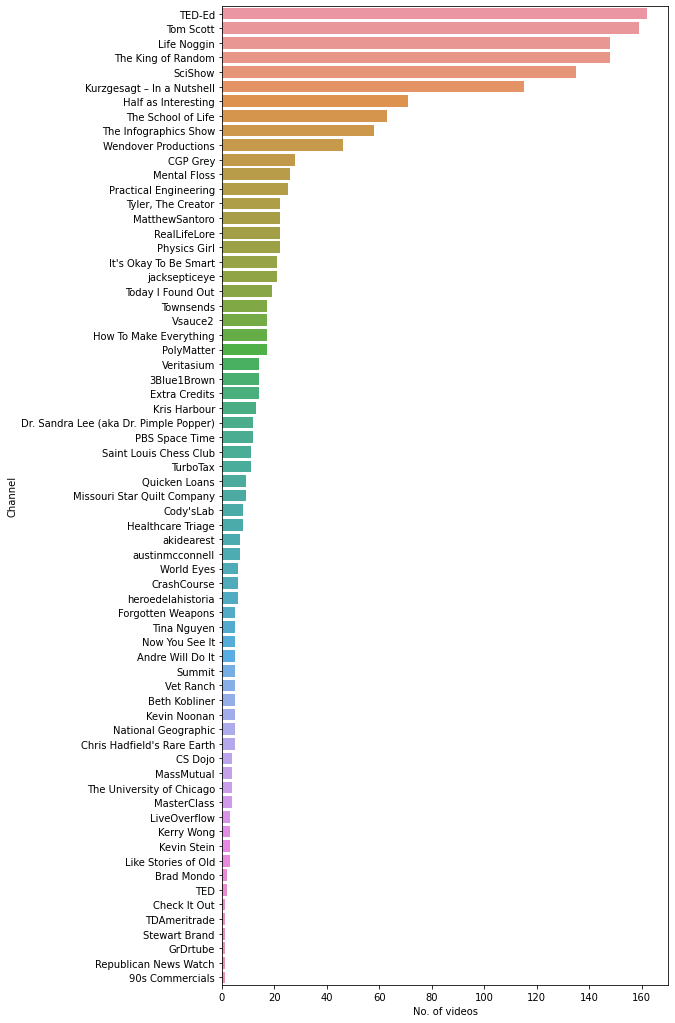

In [22]:
cdf = max_trend.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False)

fig, ax = plt.subplots(figsize=(8,18))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [23]:
cdf.head()

channel_title  video_count
47              TED-Ed          162
54           Tom Scott          159
24         Life Noggin          148
49  The King of Random          148
42             SciShow          135

In [24]:
#most common word in trending video 

from collections import Counter
title_words = list(max_trend["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('The', 411),
 ('How', 291),
 ('-', 264),
 ('the', 245),
 ('a', 220),
 ('of', 208),
 ('What', 193),
 ('Why', 176),
 ('You', 174),
 ('to', 173),
 ('in', 149),
 ('A', 147),
 ('and', 110),
 ('–', 94),
 ('Do', 84),
 ('Is', 76),
 ('If', 75),
 ('is', 66),
 ('To', 63),
 ('We', 62),
 ('Make', 58),
 ('with', 57),
 ('Black', 53),
 ('|', 52),
 ('From', 50)]

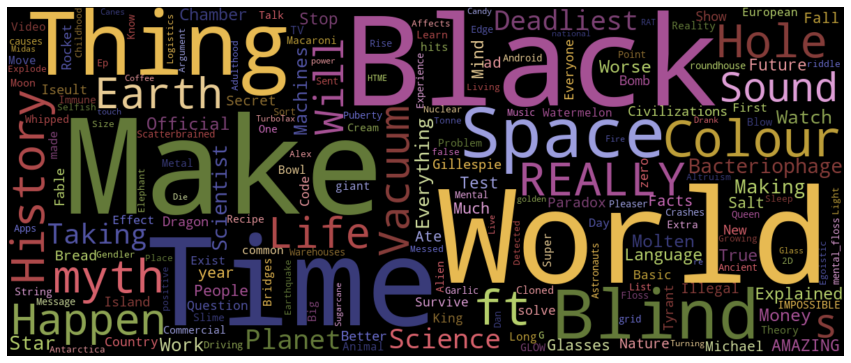

In [25]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="black", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [26]:
# LIKES/DISLIKES/VIEWS DISTRIBUTION AMONG TRENDING CONTENT

df.groupby('Category_name').agg('median').sort_values(by='views',ascending=False)

category_id      views    likes  dislikes  \
Category_name                                                      
Gaming                        20.0  1494142.0  51057.0    1956.0   
Music                         10.0  1434128.0  62280.5    1243.5   
Film & Animation               1.0  1274578.0  25176.0    1022.0   
Shows                         43.0  1155692.0  21537.0     465.0   
Comedy                        23.0   980236.0  30214.0     956.0   
Entertainment                 24.0   734704.0  16234.0     627.0   
People & Blogs                22.0   599139.0  19438.0     555.5   
Science & Technology          28.0   585748.0  16328.0     589.0   
Sports                        17.0   559352.0   5700.5     343.0   
Howto & Style                 26.0   502783.0  21492.5     502.5   
Travel & Events               19.0   494825.5  11634.0     351.0   
Pets & Animals                15.0   444501.5  14431.5     276.0   
Education                     27.0   419440.5  13508.5     397.0   
Autos & Vehicles               2.0   406278.0   5916.0     279.0   
News & Politics               25.0   244014.0   1920.0     344.0   
Nonprofits & Activism         29.0    73649.0   2721.0     122.0   

                       comment_count  comments_disabled  ratings_disabled  \
Category_name                                                               
Gaming                        8871.0                0.0               0.0   
Music                         3906.0                0.0               0.0   
Film & Animation              2636.0                0.0               0.0   
Shows                         1648.0                0.0               0.0   
Comedy                        2604.0                0.0               0.0   
Entertainment                 1693.5                0.0               0.0   
People & Blogs                1678.0                0.0               0.0   
Science & Technology          1734.0                0.0               0.0   
Sports                        1127.5                0.0               0.0   
Howto & Style                 1842.0                0.0               0.0   
Travel & Events               1674.5                0.0               0.0   
Pets & Animals                1173.0                0.0               0.0   
Education                     1466.5                0.0               0.0   
Autos & Vehicles               916.0                0.0               0.0   
News & Politics                866.0                0.0               0.0   
Nonprofits & Activism          570.0                0.0               0.0   

                       video_error_or_removed  
Category_name                                  
Gaming                                    0.0  
Music                                     0.0  
Film & Animation                          0.0  
Shows                                     0.0  
Comedy                                    0.0  
Entertainment                             0.0  
People & Blogs                            0.0  
Science & Technology                      0.0  
Sports                                    0.0  
Howto & Style                             0.0  
Travel & Events                           0.0  
Pets & Animals                            0.0  
Education                                 0.0  
Autos & Vehicles                          0.0  
News & Politics                           0.0  
Nonprofits & Activism                     0.0

In [27]:
Edu=df[df['Category_name']=='Education']
x=Edu[['title','channel_title']]
x.describe().T


count unique                                                top  \
title          1656    257  The Deadliest Being on Planet Earth – The Bact...   
channel_title  1656     67                                             TED-Ed   

              freq  
title           28  
channel_title  162

In [28]:
#top 10 trending videos with higher number of views in Education category
Edu.groupby(['title','channel_title', 'date'])[['views','likes','dislikes']].max().sort_values(by='views',ascending=False).head(10)

views  \
title                                              channel_title              date                                 
We Sent Garlic Bread to the Edge of Space, Then... Tom Scott                  2018-04-23 15:04:11+00:00  7349435   
The Deadliest Being on Planet Earth – The Bacte... Kurzgesagt – In a Nutshell 2018-05-13 12:00:22+00:00  4705269   
Why Alien Life Would be our Doom - The Great Fi... Kurzgesagt – In a Nutshell 2018-02-01 13:00:05+00:00  3675806   
Rusted butcher's knife - Impossible Restoration    Andre Will Do It           2018-03-17 14:46:57+00:00  3633365   
The Black Hole Bomb and Black Hole Civilizations   Kurzgesagt – In a Nutshell 2018-04-22 12:02:17+00:00  3373574   
A Selfish Argument for Making the World a Bette... Kurzgesagt – In a Nutshell 2018-03-18 13:10:34+00:00  3102346   
String Theory Explained – What is The True Natu... Kurzgesagt – In a Nutshell 2018-03-01 13:30:51+00:00  2982517   
Time: The History & Future of Everything – Rema... Kurzgesagt – In a Nutshell 2018-04-08 12:26:40+00:00  2626381   
Annie Leibovitz Teaches Photography | Official ... MasterClass                2017-12-14 14:40:13+00:00  2563098   
435                                                Tyler, The Creator         2018-05-22 15:20:56+00:00  2252933   

                                                                                                          likes  \
title                                              channel_title              date                                
We Sent Garlic Bread to the Edge of Space, Then... Tom Scott                  2018-04-23 15:04:11+00:00  209009   
The Deadliest Being on Planet Earth – The Bacte... Kurzgesagt – In a Nutshell 2018-05-13 12:00:22+00:00  240989   
Why Alien Life Would be our Doom - The Great Fi... Kurzgesagt – In a Nutshell 2018-02-01 13:00:05+00:00  170076   
Rusted butcher's knife - Impossible Restoration    Andre Will Do It           2018-03-17 14:46:57+00:00   34995   
The Black Hole Bomb and Black Hole Civilizations   Kurzgesagt – In a Nutshell 2018-04-22 12:02:17+00:00  176450   
A Selfish Argument for Making the World a Bette... Kurzgesagt – In a Nutshell 2018-03-18 13:10:34+00:00  189767   
String Theory Explained – What is The True Natu... Kurzgesagt – In a Nutshell 2018-03-01 13:30:51+00:00  171636   
Time: The History & Future of Everything – Rema... Kurzgesagt – In a Nutshell 2018-04-08 12:26:40+00:00  167615   
Annie Leibovitz Teaches Photography | Official ... MasterClass                2017-12-14 14:40:13+00:00    1570   
435                                                Tyler, The Creator         2018-05-22 15:20:56+00:00  129865   

                                                                                                         dislikes  
title                                              channel_title              date                                 
We Sent Garlic Bread to the Edge of Space, Then... Tom Scott                  2018-04-23 15:04:11+00:00      7966  
The Deadliest Being on Planet Earth – The Bacte... Kurzgesagt – In a Nutshell 2018-05-13 12:00:22+00:00      2125  
Why Alien Life Would be our Doom - The Great Fi... Kurzgesagt – In a Nutshell 2018-02-01 13:00:05+00:00      6956  
Rusted butcher's knife - Impossible Restoration    Andre Will Do It           2018-03-17 14:46:57+00:00      3470  
The Black Hole Bomb and Black Hole Civilizations   Kurzgesagt – In a Nutshell 2018-04-22 12:02:17+00:00      1783  
A Selfish Argument for Making the World a Bette... Kurzgesagt – In a Nutshell 2018-03-18 13:10:34+00:00      5773  
String Theory Explained – What is The True Natu... Kurzgesagt – In a Nutshell 2018-03-01 13:30:51+00:00      1860  
Time: The History & Future of Everything – Rema... Kurzgesagt – In a Nutshell 2018-04-08 12:26:40+00:00      2796  
Annie Leibovitz Teaches Photography | Official ... MasterClass                2017-12-14 14:40:13+00:00        16  
435                                                Tyler,

In [29]:
# top 10 trending content amongst all categories
df.groupby(['Category_name','title','channel_title'])[['views','likes','dislikes']].max().sort_values(by='views', ascending=False).head(10)

views  \
Category_name title                                              channel_title                     
Music         Childish Gambino - This Is America (Official Vi... ChildishGambinoVEVO   225211923   
Entertainment YouTube Rewind: The Shape of 2017 | #YouTubeRewind YouTube Spotlight     149376127   
Music         Ariana Grande - No Tears Left To Cry               ArianaGrandeVevo      148689896   
              Becky G, Natti Natasha - Sin Pijama (Official V... BeckyGVEVO            139334502   
              BTS (방탄소년단) 'FAKE LOVE' Official MV                ibighit               123010920   
              The Weeknd - Call Out My Name (Official Video)     TheWeekndVEVO         122544931   
              Luis Fonsi, Demi Lovato - Échame La Culpa          LuisFonsiVEVO         102012605   
              Cardi B, Bad Bunny & J Balvin - I Like It [Offi... Cardi B                94254507   
Entertainment Marvel Studios' Avengers: Infinity War Official... Marvel Entertainment   91933007   
Music         Maluma - El Préstamo (Official Video)              MalumaVEVO             87264467   

                                                                                         likes  \
Category_name title                                              channel_title                   
Music         Childish Gambino - This Is America (Official Vi... ChildishGambinoVEVO   5023450   
Entertainment YouTube Rewind: The Shape of 2017 | #YouTubeRewind YouTube Spotlight     3093544   
Music         Ariana Grande - No Tears Left To Cry               ArianaGrandeVevo      3094021   
              Becky G, Natti Natasha - Sin Pijama (Official V... BeckyGVEVO            1425496   
              BTS (방탄소년단) 'FAKE LOVE' Official MV                ibighit               5613827   
              The Weeknd - Call Out My Name (Official Video)     TheWeekndVEVO         1427436   
              Luis Fonsi, Demi Lovato - Échame La Culpa          LuisFonsiVEVO         2376636   
              Cardi B, Bad Bunny & J Balvin - I Like It [Offi... Cardi B               1816753   
Entertainment Marvel Studios' Avengers: Infinity War Official... Marvel Entertainment  2625661   
Music         Maluma - El Préstamo (Official Video)              MalumaVEVO             815369   

                                                                                       dislikes  
Category_name title                                              channel_title                   
Music         Childish Gambino - This Is America (Official Vi... ChildishGambinoVEVO     343541  
Entertainment YouTube Rewind: The Shape of 2017 | #YouTubeRewind YouTube Spotlight      1643059  
Music         Ariana Grande - No Tears Left To Cry               ArianaGrandeVevo        129502  
              Becky G, Natti Natasha - Sin Pijama (Official V... BeckyGVEVO              119798  
              BTS (방탄소년단) 'FAKE LOVE' Official MV                ibighit                 206892  
              The Weeknd - Call Out My Name (Official Video)     TheWeekndVEVO            40837  
              Luis Fonsi, Demi Lovato - Échame La Culpa          LuisFonsiVEVO           117196  
              Cardi B, Bad Bunny & J Balvin - I Like It [Offi... Cardi B                 102474  
Entertainment Marvel Studios' Avengers: Infinity War Official... Marvel Entertainment     53709  
Music         Maluma - El Préstamo (Official Video)              MalumaVEVO               71494

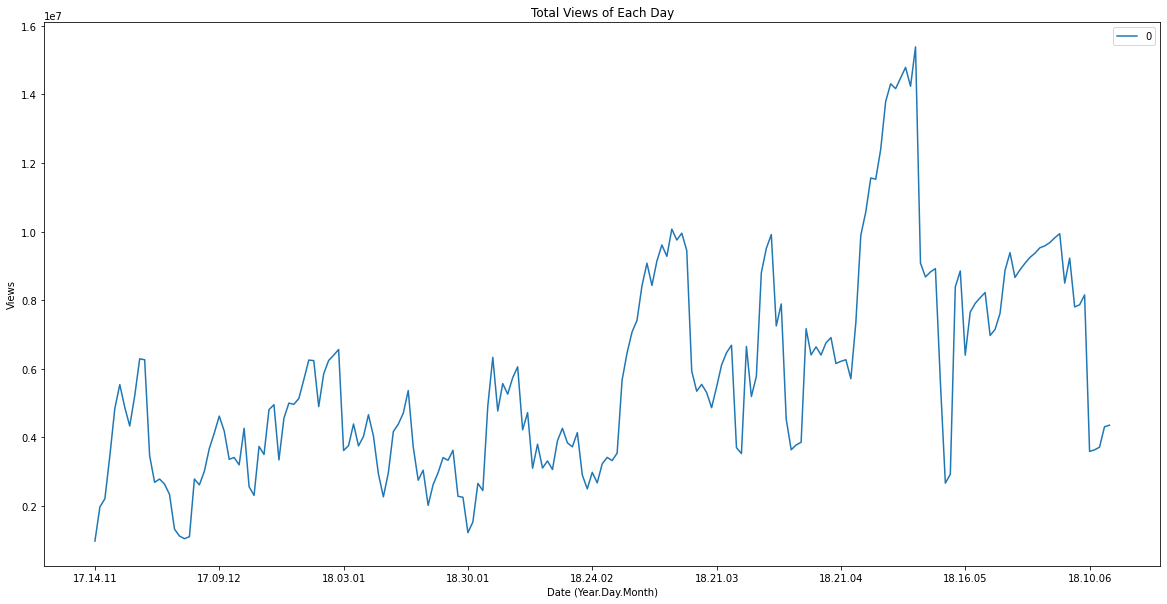

In [30]:
# The most viewble content was trending in the middle of 2018
Edu = Edu.reset_index()
date_view = Edu[['trending_date', 'views']].values
date_view_counts = {}
for i in date_view:
    if i[0] not in date_view_counts:
        date_view_counts[i[0]] = i[1]
    else:
        date_view_counts[i[0]] += i[1]
dv_df = pd.DataFrame.from_dict(date_view_counts, orient = 'index')
dv_df.plot(rot=0, figsize=(20, 10), title="Total Views of Each Day")
plt.xlabel("Date (Year.Day.Month)")
plt.ylabel("Views")
plt.show()

In [31]:
views=Edu.groupby(['title'])[['Category_name','views','likes','dislikes','comment_count']].max().sort_values(by='views', ascending=False) 
views.head(10)

Category_name    views  \
title                                                                       
We Sent Garlic Bread to the Edge of Space, Then...     Education  7349435   
The Deadliest Being on Planet Earth – The Bacte...     Education  4705269   
Why Alien Life Would be our Doom - The Great Fi...     Education  3675806   
Rusted butcher's knife - Impossible Restoration        Education  3633365   
The Black Hole Bomb and Black Hole Civilizations       Education  3373574   
A Selfish Argument for Making the World a Bette...     Education  3102346   
String Theory Explained – What is The True Natu...     Education  2982517   
Time: The History & Future of Everything – Rema...     Education  2626381   
Annie Leibovitz Teaches Photography | Official ...     Education  2563098   
435                                                    Education  2252933   

                                                     likes  dislikes  \
title                                                                  
We Sent Garlic Bread to the Edge of Space, Then...  209009      7966   
The Deadliest Being on Planet Earth – The Bacte...  240989      2125   
Why Alien Life Would be our Doom - The Great Fi...  170076      6956   
Rusted butcher's knife - Impossible Restoration      34995      3470   
The Black Hole Bomb and Black Hole Civilizations    176450      1783   
A Selfish Argument for Making the World a Bette...  189767      5773   
String Theory Explained – What is The True Natu...  171636      1860   
Time: The History & Future of Everything – Rema...  167615      2796   
Annie Leibovitz Teaches Photography | Official ...    1570        16   
435                                                 129865      1550   

                                                    comment_count  
title                                                              
We Sent Garlic Bread to the Edge of Space, Then...          28835  
The Deadliest Being on Planet Earth – The Bacte...          23357  
Why Alien Life Would be our Doom - The Great Fi...          19119  
Rusted butcher's knife - Impossible Restoration              4141  
The Black Hole Bomb and Black Hole Civilizations            12407  
A Selfish Argument for Making the World a Bette...          21031  
String Theory Explained – What is The True Natu...           9777  
Time: The History & Future of Everything – Rema...          14310  
Annie Leibovitz Teaches Photography | Official ...             73  
435                                                          6673

In [32]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Data_Analysis')

In [33]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
profile.to_file(output_file="Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
#  ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 